In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data=pd.read_csv('UberDataset.csv')
df=pd.DataFrame(data)
import seaborn as sns

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [52]:
df.shape

(1156, 7)

In [54]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016,01-01-2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016,01-02-2016,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016,01-02-2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016,01-05-2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016,01-06-2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [56]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"], errors="coerce")

In [58]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN


In [60]:
df.dropna(subset=["START", "STOP"], inplace=True)
df["PURPOSE"].fillna("Unknown", inplace=True)

In [62]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,2016-01-01,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,2016-01-02,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02,2016-01-02,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,2016-01-05,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,2016-01-06,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [64]:
# Create a new column for trip date
df["DATE"] = df["START_DATE"].dt.date

In [66]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE
0,2016-01-01,2016-01-01,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02,2016-01-02,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02
2,2016-01-02,2016-01-02,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05,2016-01-05,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06,2016-01-06,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


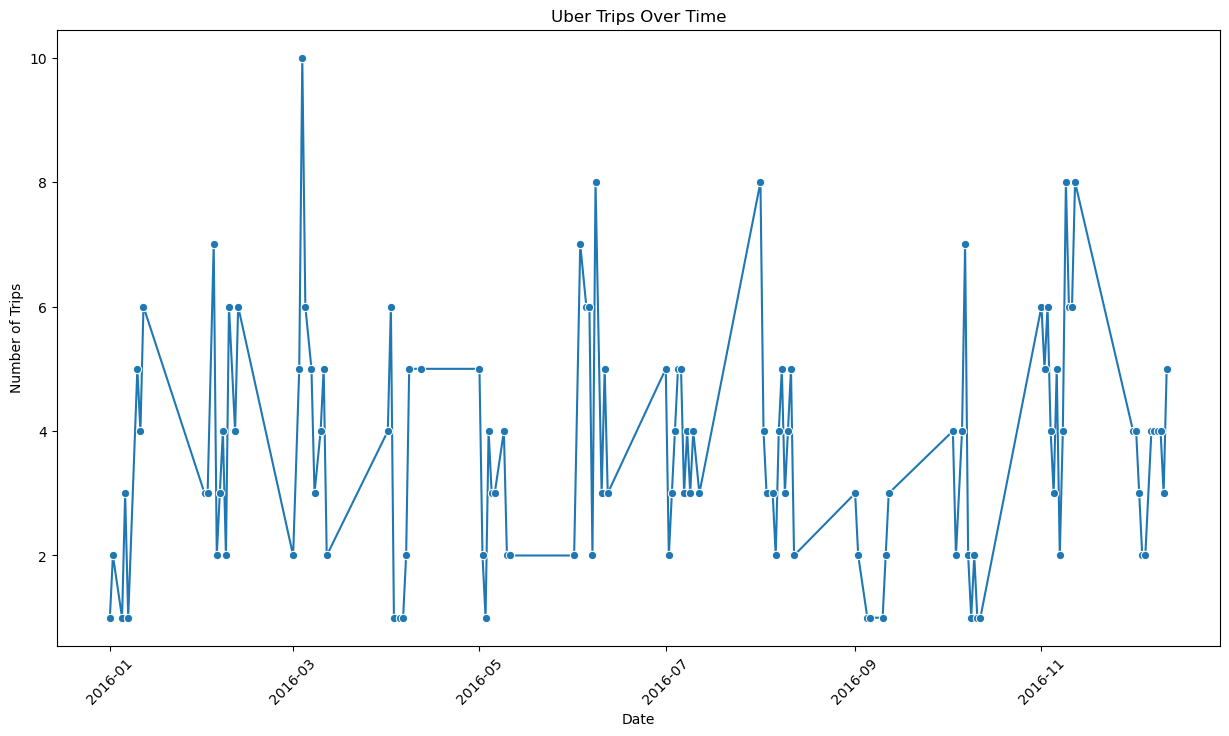

In [68]:
# Plot trip frequency over time
plt.figure(figsize=(15, 8))
sns.lineplot(x=df["DATE"].value_counts().sort_index().index,
             y=df["DATE"].value_counts().sort_index().values, marker="o")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.show()


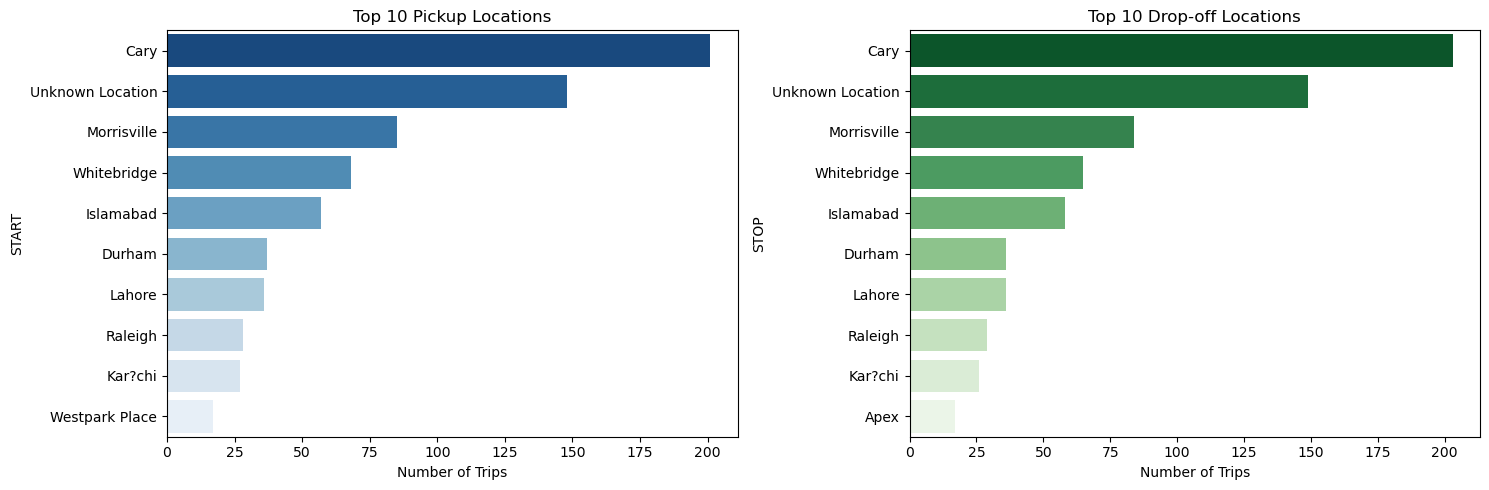

In [70]:
# Top 10 most common pickup and drop-off locations
top_pickups = df["START"].value_counts().head(10)
top_dropoffs = df["STOP"].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Pickup Locations")
axes[0].set_xlabel("Number of Trips")
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 Drop-off Locations")
axes[1].set_xlabel("Number of Trips")
plt.tight_layout()
plt.show()

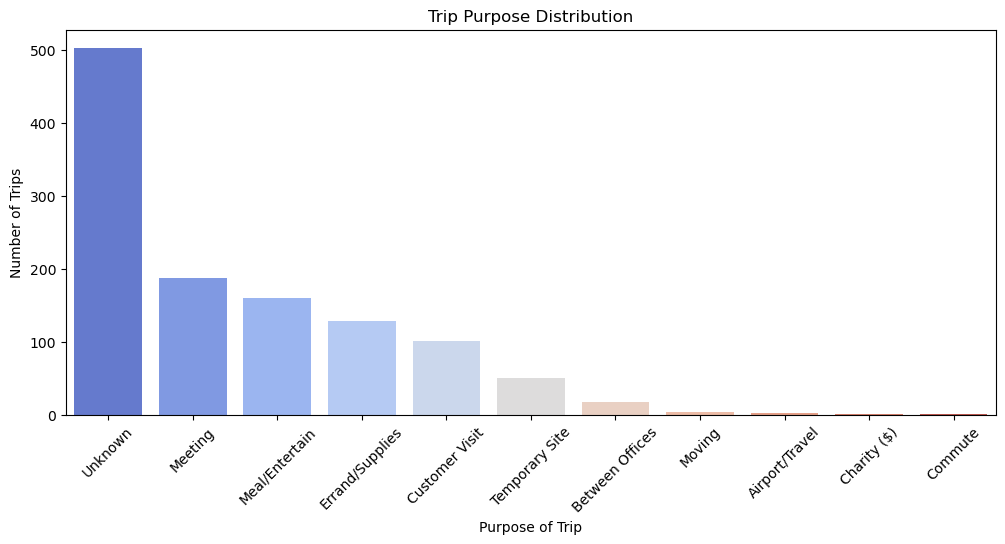

In [72]:
# Count of trips by purpose
trip_purpose_counts = df["PURPOSE"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=trip_purpose_counts.index, y=trip_purpose_counts.values, palette="coolwarm")
plt.xlabel("Purpose of Trip")
plt.ylabel("Number of Trips")
plt.title("Trip Purpose Distribution")
plt.xticks(rotation=45)
plt.show()

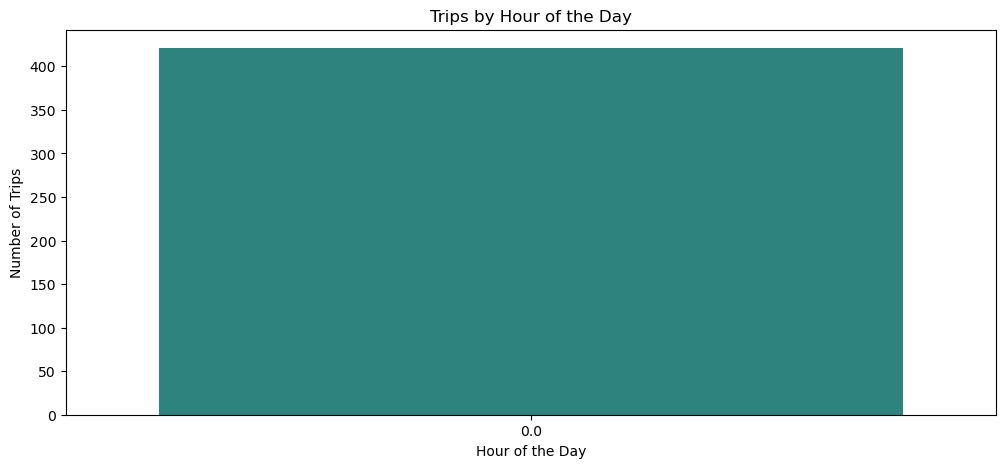

In [34]:
# Hourly trip analysis
df["HOUR"] = df["START_DATE"].dt.hour
plt.figure(figsize=(12, 5))
sns.countplot(x=df["HOUR"], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips by Hour of the Day")
plt.show()

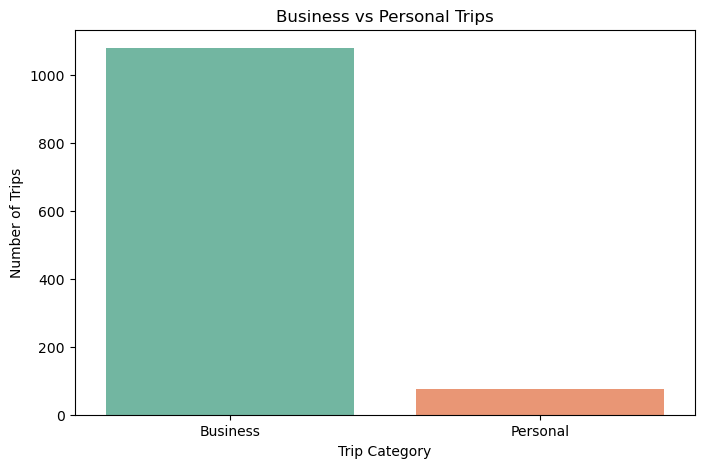

In [36]:
# Category-wise trip distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["CATEGORY"], palette="Set2")
plt.xlabel("Trip Category")
plt.ylabel("Number of Trips")
plt.title("Business vs Personal Trips")
plt.show()


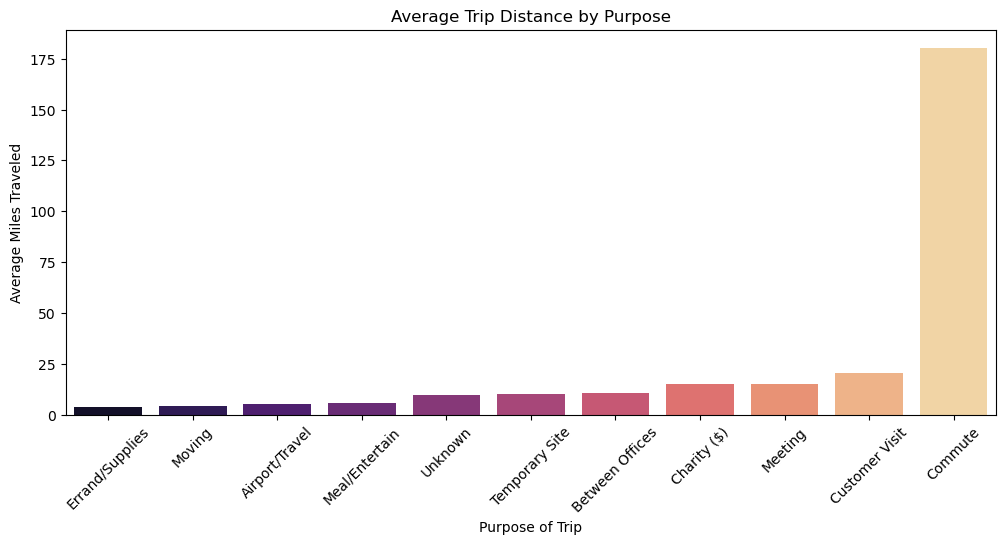

In [38]:
# Average trip distance by purpose
avg_miles_purpose = df.groupby("PURPOSE")["MILES"].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_miles_purpose.index, y=avg_miles_purpose.values, palette="magma")
plt.xlabel("Purpose of Trip")
plt.ylabel("Average Miles Traveled")
plt.title("Average Trip Distance by Purpose")
plt.xticks(rotation=45)
plt.show()
